# Notebook Imports and packages

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff
from math import log

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
%matplotlib inline

# Example1
## $f(x) = x^2 + x + 1$

In [5]:
# for a function
def f(x):
    return x**2 + x + 1
# slope of a function
def df(x):
    return 2*x + 1


In [6]:
#Make Data
x_1 = np.linspace(start= -3, stop = 3, num = 100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

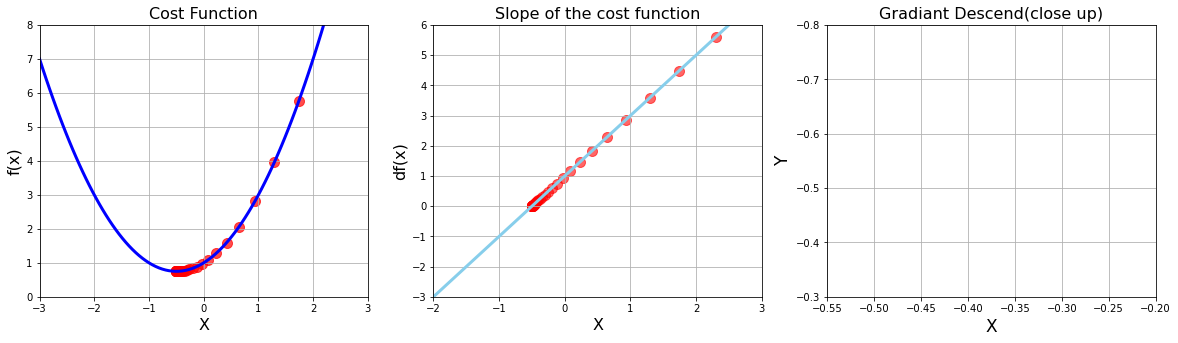

In [10]:
#plot 1 : cost function

plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
plt.title('Cost Function', fontsize= 16)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.grid()
plt.xlabel('X', fontsize= 16)
plt.ylabel('f(x)', fontsize= 16)
value = np.array(x_list)
plt.scatter(x_list, f(value), color= 'red', s= 100, alpha = 0.7)
plt.plot(x_1, f(x_1), color='blue', linewidth = 3)


#plot 2 : derivative
plt.subplot(1,3,2)
plt.title('Slope of the cost function', fontsize= 16)
plt.xlabel('X', fontsize= 16)
plt.ylabel('df(x)', fontsize= 16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.plot(x_1, df(x_1), color='skyblue', linewidth= 3)

plt.scatter(x_list, slope_list,color='red', s=100, alpha = 0.6)


# plot 3 : derivative closeup
plt.subplot(1,3,3)
plt.title('Gradiant Descend(close up)', fontsize = 16)
plt.xlabel('X', fontsize = 17)
plt.ylabel('Y', fontsize = 17)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, -0.8)
plt.plot(x_1, df(x_1), color='skyblue', linewidth= 6, alpha =0.8)
plt.scatter(x_list, slope_list, color= 'red', s= 300, alpha = 0.6)

plt.show()


# Slope & Derivatives

Chellange: Create a python function for derivative of $f(x)$ and $df(x)$

In [9]:
# gradiant Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]
 
for n in range(50):
    previous_x = new_x
    gradiant = df(previous_x) 
    new_x = previous_x - step_multiplier *gradiant
    step_size = abs(new_x- previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size<precision:
        print('Loop run this many times', n)
        break
    print(step_size)
print('local minimum occurs at :', new_x)
print('slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))
    
    

0.7000000000000002
0.56
0.44799999999999995
0.35840000000000005
0.28672
0.22937600000000002
0.18350079999999996
0.14680063999999998
0.11744051199999997
0.09395240959999998
0.07516192767999996
0.06012954214399996
0.04810363371519999
0.03848290697216
0.03078632557772798
0.024629060462182384
0.019703248369745907
0.015762598695796715
0.012610078956637405
0.010088063165309913
0.00807045053224792
0.006456360425798335
0.005165088340638668
0.0041320706725109235
0.003305656538008739
0.0026445252304070355
0.002115620184325595
0.001692496147460476
0.001353996917968392
0.0010831975343746914
0.0008665580274997975
0.0006932464219998047
0.000554597137599866
0.00044367771007985946
0.00035494216806392087
0.0002839537344511145
0.0002271629875609249
0.00018173039004870661
0.0001453843120389764
0.00011630744963120332
Loop run this many times 40
local minimum occurs at : -0.49962781616118024
slope or df(x) value at this point is:  0.0007443676776395236
f(x) value or cost at this point is:  0.75000013852080

# Example 2 Multiple Minima vs Inital Guess & Advanced Functions

## $$g(x) = x^4 -4x^2 + 5$$

In [14]:
x_2 = np.linspace(-2, 2 ,1000)

In [15]:
def g(x):
    return x**4 -4*x**2 + 5
def dg(x):
    return 4*x**3-8*x

# Garadiant Descent  as a Python Function

In [18]:
def gradient_descent(derivative_func, initial_guess, multiplier= 0.02,precision= 0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier *gradient 
        
        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size<precision:
            break
    return new_x, x_list, slope_list

NameError: name 'list_x' is not defined

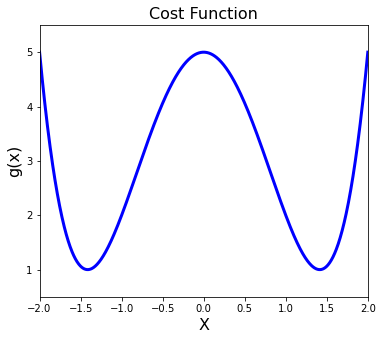

In [19]:
#plot 1 : cost function

plt.figure(figsize = [20,5])
plt.subplot(1,3,1)
plt.title('Cost Function', fontsize= 16)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X', fontsize= 16)
plt.ylabel('g(x)', fontsize= 16)
value = np.array(x_list)
plt.plot(x_2, g(x_2), color='b', linewidth = 3)
plt.scatter(list_x, g(np.array(list_x)), color= 'r', s=100, alpha=0.6)

 
#plot 2 : derivative
plt.subplot(1,3,2)
plt.title('Slope of the cost function', fontsize= 16)
plt.xlabel('X', fontsize= 16)
plt.ylabel('dg(x)', fontsize= 16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth= 5)
plt.scatter(list_x, deriv_list, color = 'r', s= 100, alpha= 0.6)


plt.show()

## Example3 - Divergence , overflow and python Tuples
# $$h(x)= x^5 -2x^4+ 2$$


In [ ]:
x_3 = np.linspace(start= -2.5, stop= 2.5, num= 1000)

def h(x):
    return x**5 -2*x**4 +2
def dh(x):
    return 5*x**4 -8*x**3

In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func= dh, initial_guess= 0.2,
                                                max_iter=300)
plt.figure(figsize= [15,5])
plt.subplot(1,2,1)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('cost function', fontsize= 16)
plt.xlabel('X', fontsize= 16)
plt.ylabel('h(x)', fontsize= 16)

plt.plot(x_3, h(x_3), color= 'b', linewidth= '5', alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='r', linewidth= 5, alpha=0.8)

plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X',fontsize = 16)
plt.ylabel('dh(x)',fontsize = 16)
plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3, dh(x_3), color= 'b', linewidth='5', alpha=0.8)
plt.scatter(list_x, deriv_list, color='r', s=100, alpha=0.5)

plt.show()

print('local min occur at: ',local_min)
print('cost at this minimum is: ',h(local_min))
print('number of steps: ', len(list_x))

## Python Tuples

In [ ]:
#creating a tuple
breakfast ='bacon', 'eggs', 'avocado'
unlucky_numbers= 13,4,9,26,17

print('I love beacons', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Infinite Loop', 'Cupertino', 95101
# Tuples are the list contains both integer and string values.
# Tuples are immutable once we create a tuples we can't change it.
tuple_with_a_single_value = 42,
print(tuple_with_a_single_value)
main, side , greens= breakfast
print('Main course is', main)

# Learning Rate

In [ ]:
n = 200
low_gamma = gradient_descent(derivative_func= dg, initial_guess= 3,multiplier= 0.0005, precision= 0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func= dg, initial_guess= 3,multiplier= 0.0001, precision= 0.0001, max_iter=n)
high_gamma= gradient_descent(derivative_func= dg, initial_guess= 3,multiplier= 0.0002, precision= 0.0001, max_iter=n)
insane_gamma= gradient_descent(derivative_func = dg, initial_guess=1.9,multiplier=0.25, precision= 0.001,max_iter=n)
plt.figure(figsize = [50,10])
plt.subplot(1,3,1)

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of the learning Rate', fontsize=16)
plt.xlabel('No of iterations', fontsize= 16)
plt.ylabel('cost', fontsize= 16)
low_values = np.array(low_gamma[1])
mid_values= np.array(mid_gamma[1])
high_values= np.array(high_gamma[1])

iteration_list=list(range(0, n+1))

plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth = 3)
plt.scatter(iteration_list, g(low_values), color= 'lightgreen', s=100, alpha=0.6)

plt.plot(iteration_list, g(mid_values),color ='yellow', linewidth = 3)
plt.scatter(iteration_list,g(mid_values), color = 'yellow', linewidth = 3, s= 80)

plt.plot(iteration_list, g(high_values), color='hotpink', linewidth = 3)
plt.scatter(iteration_list, g(high_values), color='hotpink', linewidth =3, s= 80)

plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='r', linewidth = 3)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='r', linewidth =3, s= 80)
           
plt.show()


# Example 4 - Data Viz with 3D charts
## Minimise $$f(x, y) = \frac{1}{3^{-x^2-y^2}+1}$$

Minimize $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 -y^2}$

In [85]:
def f(x,y):
    r= 3**(-x**2 - y**2)
    return 1/(r + 1)

In [86]:
x_4 = np.linspace(start= -2, stop = 2, num =200)
y_4 = np.linspace(start= -2, stop = 2, num =200)

print('shape of X array', x_4.shape)
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4)

shape of X array (200,)
Array after meshgrid:  [[-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]
 [-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]
 [-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]
 ...
 [-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]
 [-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]
 [-2.         -1.9798995  -1.95979899 ...  1.95979899  1.9798995
   2.        ]]


C:\Users\USER\AppData\Local\Temp/ipykernel_10640/940703940.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


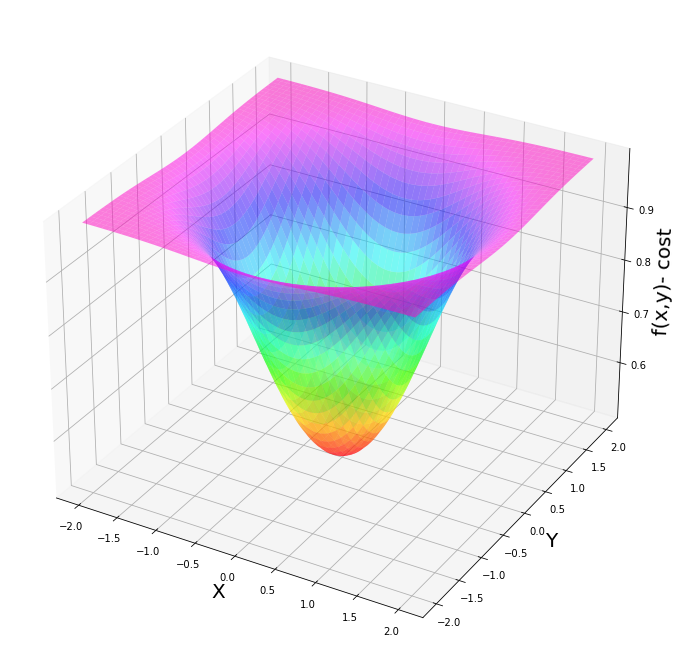

In [105]:
# genearating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize= 20)
ax.set_ylabel('Y', fontsize= 20)
ax.set_zlabel('f(x,y)- cost', fontsize= 20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap= cm.gist_rainbow, alpha= 0.5)

plt.show()

## Partial derivatives and Symbolic function 
$$\frac{\partial f}{\partial x} = \frac{2x \ln (3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2} +1 \right)^2}$$

$$\frac{\partial f}{\partial y} = \frac{2y \ln (3) \cdot 3^{-x^2-y^2}}{\left(3^{-x^2-y^2} +1 \right)^2}$$

In [88]:
a, b = symbols('x, y')
print('our cost function f(x,y) is :',f(a,b))
print('The partial derivative is :', diff(f(a,b), a))
print('value of f(x,y) at x=1.8 y=1.0 is:',
      f(a,b).evalf(subs = {a: 1.8, b: 1.0}))
print('value:', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))      

      

our cost function f(x,y) is : 1/(3**(-x**2 - y**2) + 1)
The partial derivative is : 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
value: 0.0368089716197505


## Batch gradiant Descent with SymPy

In [89]:
#setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])

for n in range (max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    
print('values in gradiant Array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('minimum occurs at y value of: ', params[1])
print('The cost if: ', f(params[0], params[1]))

values in gradiant Array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
minimum occurs at y value of:  1.92132555492129e-11
The cost if:  0.500000000000000


In [99]:
#partial derivative functions example 4
def fpx (x,y):
    r = 3**(-x**2 -y**2)
    return 2*x*log(3)*r/ (r+1)**2
def fpy(x,y):
    r = 3**(-x**2 -y**2)
    return 2*y*log(3)*r /(r + 1)**2

In [91]:
fpx(1.8, 1.0)

0.020449428677639166

In [92]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])

for n in range (max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpx(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    
print('values in gradiant Array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('minimum occurs at y value of: ', params[1])
print('The cost if: ', f(params[0], params[1]))

values in gradiant Array:  [1.41510514e-09 1.41510514e-09]
Minimum occurs at x value of:  0.8000000027663864
minimum occurs at y value of:  2.7663855807844933e-09
The cost if:  0.6688773522529676


## Graphing 3D gradiant Descent & Adv Numpy Arrays

C:\Users\USER\AppData\Local\Temp/ipykernel_10640/628536329.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


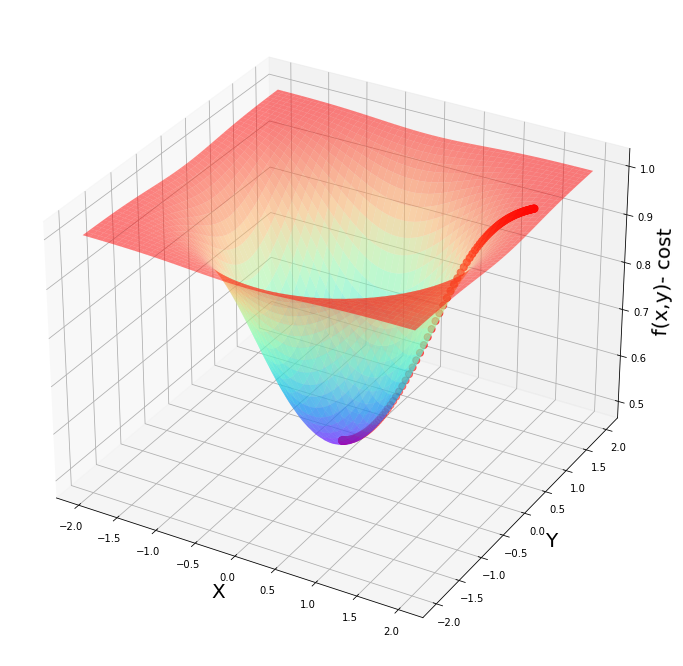

In [114]:
# genearating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize= 20)
ax.set_ylabel('Y', fontsize= 20)
ax.set_zlabel('f(x,y)- cost', fontsize= 20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap= cm.rainbow, alpha= 0.5)
ax.scatter(values_array[:, 0], values_array[:,1], 
           f(values_array[:,0], values_array[:,1]), s= 50, color= 'red')
plt.show()


In [113]:
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1])
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range (max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients\
# np.append is not the only way, we can also use concatinate let
#comment out this line of code for a while
    
    
    #values_array = np.append(values_array, params.reshape(1,2), axis= 0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
    
print('values in gradiant Array: ', gradients)
print('Minimum occurs at x value of: ', params[0])
print('minimum occurs at y value of: ', params[1])
print('The cost if: ', f(params[0], params[1]))

(1, 2)
values in gradiant Array:  [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
minimum occurs at y value of:  0.0004410547278526219
The cost if:  0.5000002265349848


In [79]:
# advanced Numpy array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['black thought', 'MC'], ['Questlove', 'Drums']])


print(hs_band.shape)
print('hs_band[0]', hs_band[0])
print('hs_band[0][1]', hs_band[1][0])

the_root = np.append(arr = hs_band, values = kirk, axis =0)
print(the_root)
print('printing nicknames.....', the_root[:,0])
the_root = np.append(arr= the_root, values = [['malik B', 'MC']], axis = 0)
print('Printing band roles......', the_root[:,1])

(1, 2)
(2, 2)
hs_band[0] ['black thought' 'MC']
hs_band[0][1] Questlove
[['black thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
printing nicknames..... ['black thought' 'Questlove' 'Captain']
Printing band roles...... ['MC' 'Drums' 'Guitar' 'MC']


#  Example 5 - Working with Data & a Real cost Function
## Mean Squared Error : a cost function for regression problems
### $$ RSS = \sum_{i=1}^{n} \big (y^{(i)-h_\theta x^{(i)}}\big)^2$$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big (y^{(i)-h_\theta x^{(i)}}\big)^2$$
### $$ MSE = \frac {1}{n} \sum_{i=1}^{n} \big (y- \hat{y} \big)^2$$


In [5]:
# make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).reshape(7,1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

#Quick linearregression

regr= LinearRegression()
regr.fit(x_5, y_5)

print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)
Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


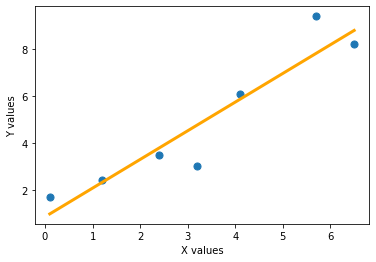

In [6]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color = 'orange', linewidth=3)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [7]:
# y_hat = theta0 + thetal*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5

print('estimated values y_hat are: \n', y_hat)
print('In comparison the actual y values are \n', y_5)

estimated values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [8]:
def mse(y , y_hat):
    #mse_calc = 1/7 * sum((y- y_hat)**2) in this value if fixed 
    #mse_calc = (1/y.size)* sum((y- y_hat)**2) in this the size function calculate the size of the array
    
    mse_calc = np.average((y-y_hat)**2, axis = 0) # in this we use average of the array.
    return mse_calc

In [9]:
print('manually calculated MSE func',mse(y_5, y_hat))
print('Mse regression using manual calculation is:', mean_squared_error(y_5, y_hat))
print('Mse regression is:', mean_squared_error(y_5, regr.predict(x_5)))

manually calculated MSE func [0.94796558]
Mse regression using manual calculation is: 0.9479655759794577
Mse regression is: 0.9479655759794577


## 3D Plot for the MSE Cost Function
### Make data for thetas

In [10]:
nr_thetas = 200
th_0 = np.linspace(start = -1, stop =3, num = nr_thetas)
th_1 = np.linspace(start = -1, stop =3, num = nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
plot_t0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

### Calc MSE using nested for loops

In [11]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [12]:
# Nested loops practice
for i in range(3):
    for j in range(3):
        print(f'Value of i is {i} and j is {j}')

Value of i is 0 and j is 0
Value of i is 0 and j is 1
Value of i is 0 and j is 2
Value of i is 1 and j is 0
Value of i is 1 and j is 1
Value of i is 1 and j is 2
Value of i is 2 and j is 0
Value of i is 2 and j is 1
Value of i is 2 and j is 2


C:\Users\USER\AppData\Local\Temp/ipykernel_6316/3233978828.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


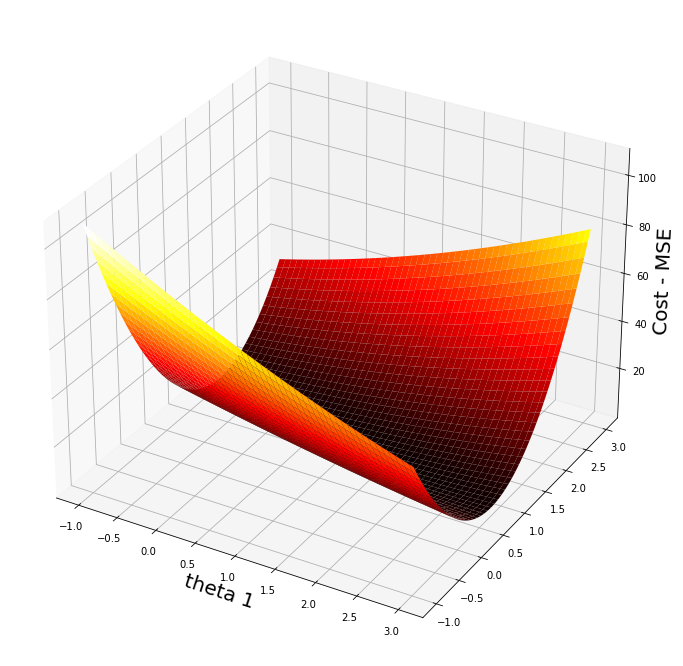

In [13]:
# plotting MSE
fig = plt.figure(figsize =[16,12])
ax = fig.gca(projection = '3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_xlabel('theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.hot)
plt.show()

In [14]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices= plot_cost.argmin(), dims= plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('MIn MSE for theta 0 at plot')

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
MIn MSE for theta 0 at plot


C:\Users\USER\AppData\Local\Temp/ipykernel_6316/3736166734.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  ij_min = np.unravel_index(indices= plot_cost.argmin(), dims= plot_cost.shape)


### Partial Derivative of MSE w.r.t $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i= 1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i= 1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$$

## MSE & Gradiant Descent

In [15]:
#xvalues, y values, array of theta paramaeters (theta0 at index 0 and theta1 at index 1)
def grad(x,y, thetas):
    n= y.size
    
    #chellange: to create the theta0_slope and theta0_slope to hold slope values from partial derivatives
    theta0_slope = (-2/n)*sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n)*sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_shape[0], thetal_slope[0]])
    #return np.append(arr= theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis= 0)

In [19]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# collecting data points for scatter plot

plot_vals= thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)
for i in range(1000):
    thetas = thetas - multiplier *grad(x_5, y_5, thetas)
    
    #append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)),axis = 0)
    mse_vals = np.append(arr =mse_vals, values =mse(y_5, thetas[0]+ thetas[1]*x_5))
#results 
print('Min occur at Theta 0:', thetas[0])
print('Min occur at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occur at Theta 0: 0.8532230461743415
Min occur at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


C:\Users\USER\AppData\Local\Temp/ipykernel_6316/3156240899.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


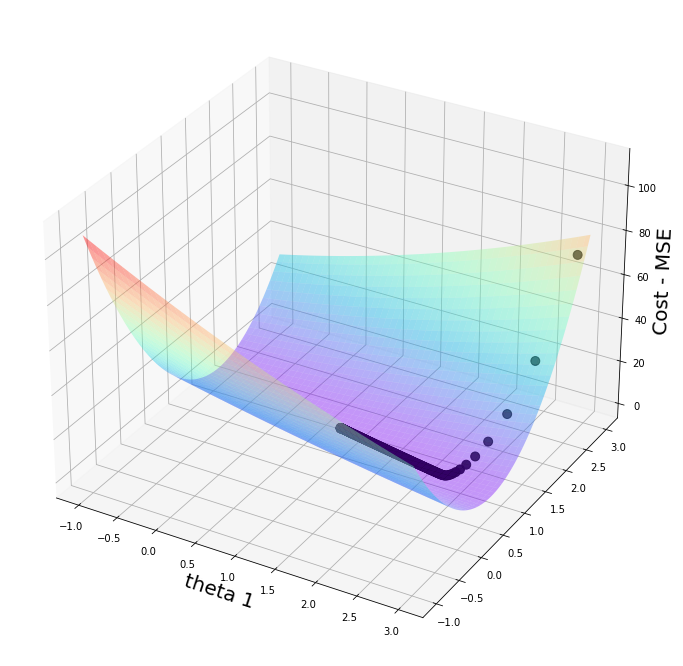

In [24]:
# plotting MSE
fig = plt.figure(figsize =[16,12])
ax = fig.gca(projection = '3d')
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_xlabel('theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s= 80, color= 'black')

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.rainbow, alpha= 0.4)
plt.show()